In [1]:
from parsing2 import parsing
from os import path
import numpy as np
import pandas
from data import Unit, Texte, Campagne, Annotateur, Relation, Annotation, Theme
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib import pyplot as plt

In [2]:
AnnotationDirectory = "Campagne 2018"
projectDirectory = "F:\\Documents\\GitHub\\AnnotationSlamPTut"
textsNames = ["Bac_a_sable","Florence","Provocation"]
textDirectories = [path.join(projectDirectory,AnnotationDirectory,t) for t in textsNames]

camp = parsing(textDirectories)

typesRel = {"Narration":"horizontale", "Réponse":"horizontale", "Elaboration descriptive":"verticale", "Elaboration evaluative":"verticale", "Elaboration prescriptive":"verticale", "Conduite":"verticale","Phatique":"verticale","Contre-élaboration":"verticale","Méta-question":"verticale","Question":"verticale"}
camp.typesRelations = typesRel

F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A01.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A02.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A03.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A04.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A05.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A06.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A07.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A08.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A09.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A10.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations\A11.aa
F:\Documents\GitHub\AnnotationSlamPTut\Campagne 2018\Bac_a_sable\Annotations

In [3]:
annots_bas = camp.getAnnotations("Bac_a_sable")

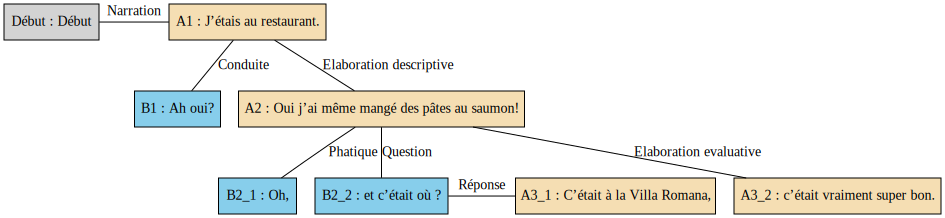

In [14]:
annots_bas[1].dessinerArbre()

In [7]:
raplaplapla = [a.matrice().sum(0).as_matrix().reshape(-1) for a in annots_bas]

C:\Users\Corentin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [8]:
raplaplapla

[array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,

In [37]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [31]:
Z = linkage(raplaplapla, method="average", metric=scipy.spatial.distance.hamming)

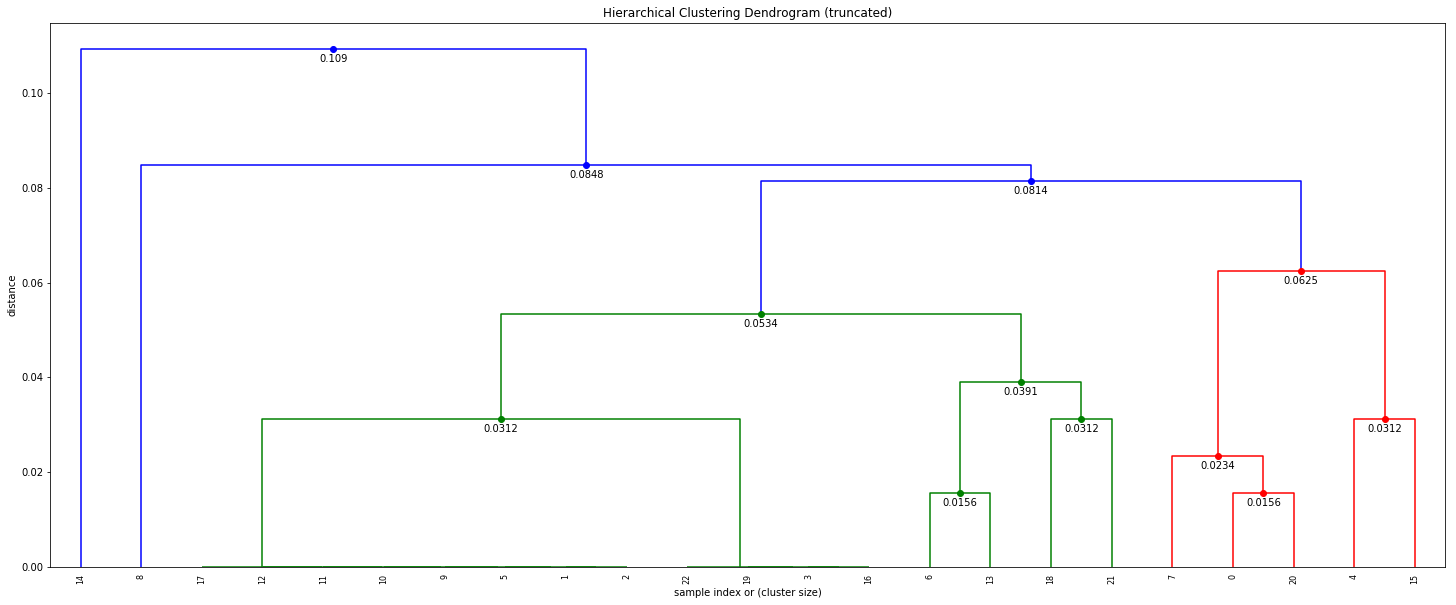

In [38]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [33]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(raplaplapla, metric=scipy.spatial.distance.hamming))
c

0.89204913047969303

In [36]:
Z

array([[  1.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00],
       [  5.00000000e+00,   2.30000000e+01,   0.00000000e+00,
          3.00000000e+00],
       [  3.00000000e+00,   1.60000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  9.00000000e+00,   2.40000000e+01,   0.00000000e+00,
          4.00000000e+00],
       [  1.00000000e+01,   2.60000000e+01,   0.00000000e+00,
          5.00000000e+00],
       [  1.10000000e+01,   2.70000000e+01,   0.00000000e+00,
          6.00000000e+00],
       [  1.20000000e+01,   2.80000000e+01,   0.00000000e+00,
          7.00000000e+00],
       [  1.70000000e+01,   2.90000000e+01,   0.00000000e+00,
          8.00000000e+00],
       [  1.90000000e+01,   2.50000000e+01,   0.00000000e+00,
          3.00000000e+00],
       [  2.20000000e+01,   3.10000000e+01,   0.00000000e+00,
          4.00000000e+00],
       [  0.00000000e+00,   2.00000000e+01,   1.56250000e-02,
          2.00000000e+00],
       [  6.00000000e

In [40]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 4, criterion='maxclust')

In [41]:
clusters

array([2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1], dtype=int32)